**Table of Contents** <br>

* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3.Initial Analysis](#initialanalysis)
* [4. Data Pre-Processing](#datapreprocessing)
    * [4.1 Data Partition](#datapartition)
    * [4.2 Missing Values](#missingvalues)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data partition
from sklearn.model_selection import train_test_split

#empty values
import missingno as msno
#from sklearn.impute import KNNImputer

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

#
from math import ceil

#scaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [5]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [7]:
train.head(20)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [8]:
test.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.00,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.00,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
5,2022-12-28,36,N,2023-01-02,N,0.00,1986.0,2023-01-02,NaN,NYC TRANSIT AUTHORITY,...,III,NaN,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,77.0,MENTAL STRESS,66.0,NO PHYSICAL INJURY,10941,4
6,2022-12-22,19,N,2023-01-02,N,688.20,2003.0,2022-12-30,NaN,"WAL-MART ASSOCIATES, INC.",...,I,NaN,56.0,LIFTING,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14131,6
7,2022-12-13,43,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,ERIE INSURANCE CO OF NY,...,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,49.0,SPRAIN OR TEAR,53.0,KNEE,13357,4
8,2022-12-28,40,N,2023-01-02,N,0.00,1982.0,2022-12-31,NaN,STARR INDEMNITY & LIABILITY CO,...,IV,NaN,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),11735,3
9,2022-11-01,48,N,2023-01-02,Y,1180.74,1974.0,2023-01-02,2023-01-09,STATE INSURANCE FUND,...,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14720,0


In [9]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 33)
Test dimensions: (387975, 30)


In [10]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
Test columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [13]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,...,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,...,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,...,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,...,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,...,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,...,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,...,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,...,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,...,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [14]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,...,387975,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,...,5,NaN,NaN,74,NaN,56,NaN,51,6276,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,...,IV,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,...,182276,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,...,NaN,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,...,NaN,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,...,NaN,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,...,NaN,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,5.000000


In [15]:
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())

False    593471
Name: count, dtype: int64
False    387975
Name: count, dtype: int64


<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

In [17]:
#set Claim Identifier as index
train.set_index('Claim Identifier', inplace=True) 
test.set_index('Claim Identifier', inplace=True)

<hr>
<a class="anchor" id="missingvalues">
    
## Missing Values
    
</a>

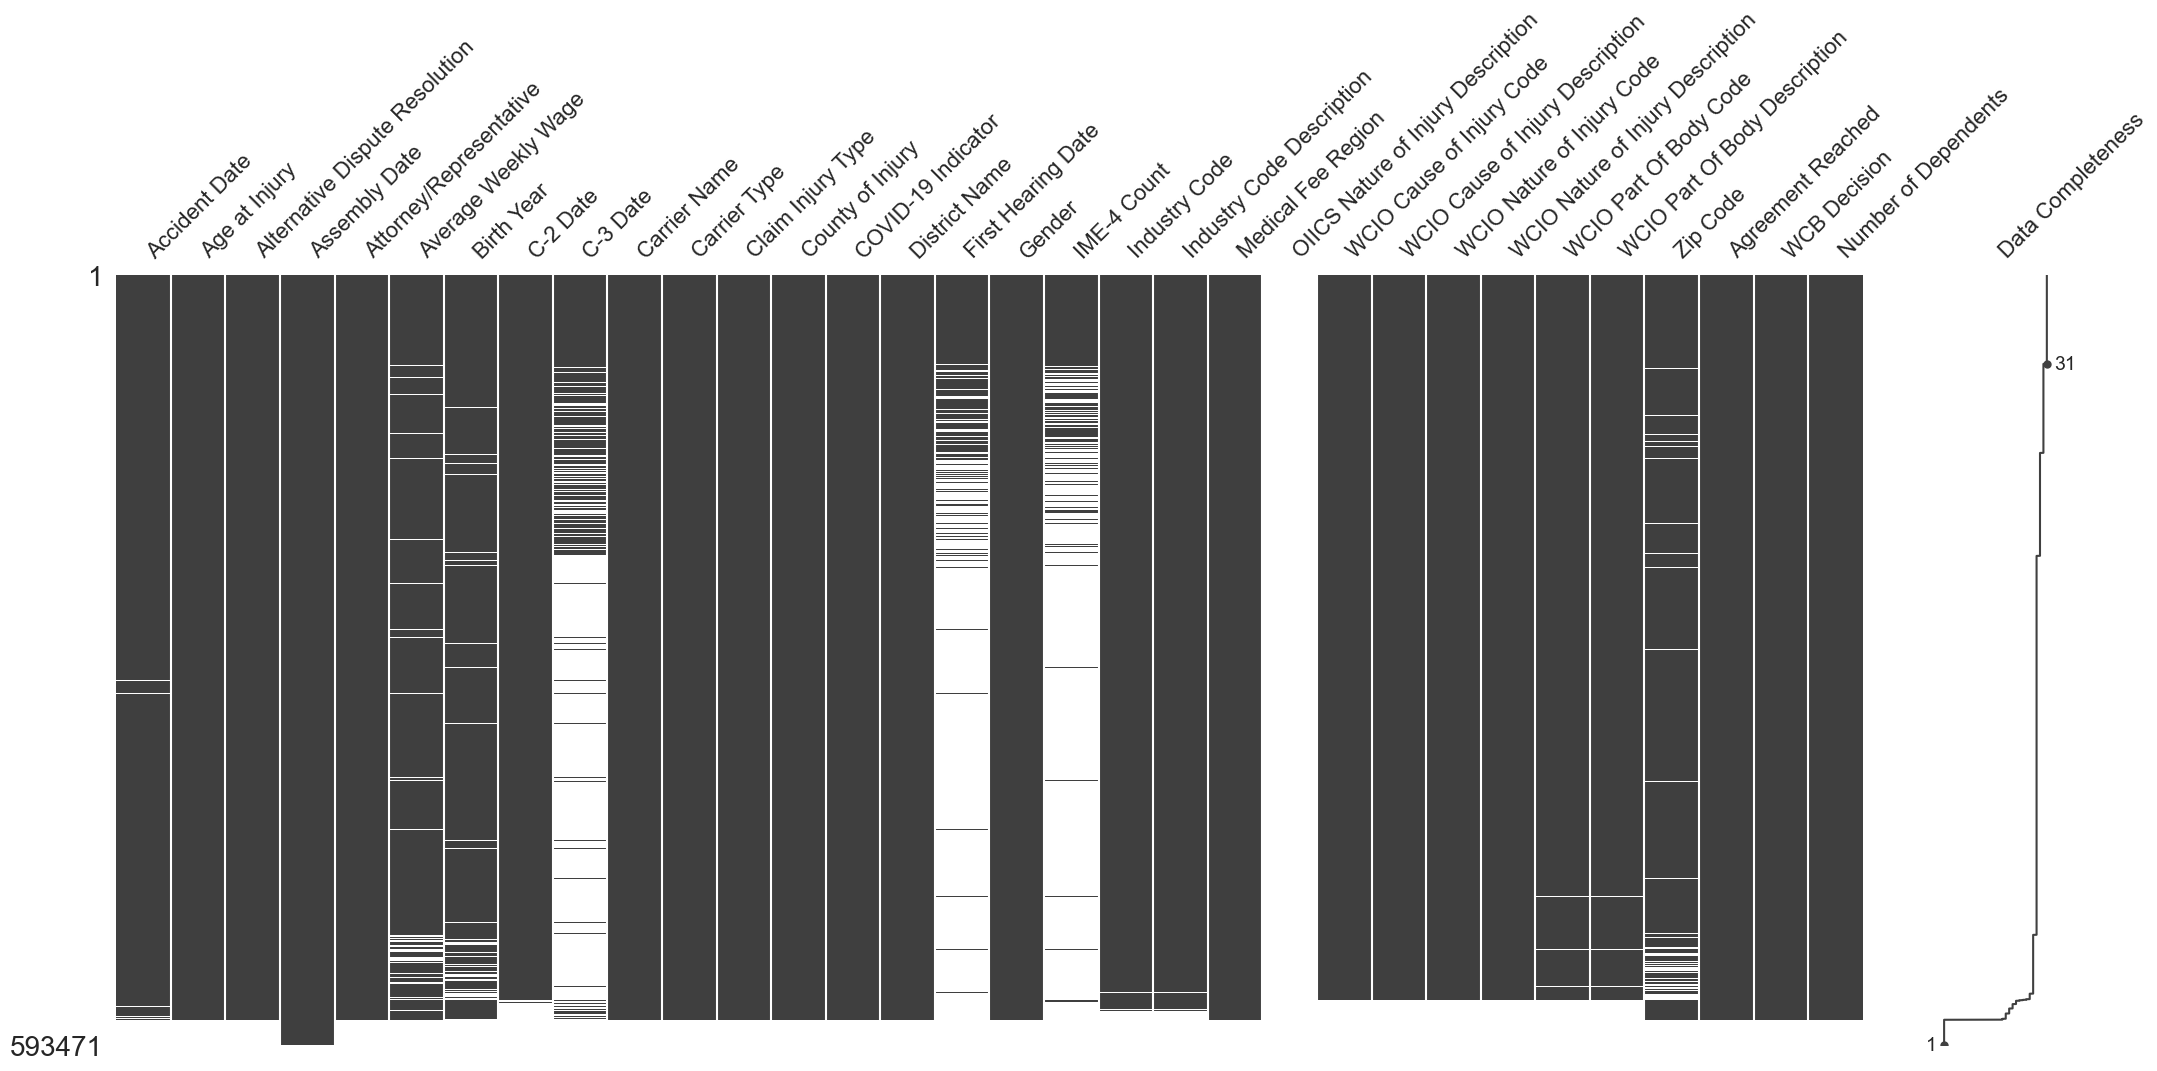

In [19]:
msno.matrix(train, labels=True, sort="descending");

In [20]:
# first hearing date - blank values mean it hasnt been set yet

In [21]:
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{"]
train.replace(strange_values_list,np.nan, inplace=True)

In [22]:
train.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Nature of Injury Description    593471
WCIO Cause

In [23]:
test.isna().sum()

Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Injury Code              10348
WCIO Cause

In [24]:
# Delete the column with all missing values
train.drop('OIICS Nature of Injury Description', inplace = True, axis = 1)
test.drop('OIICS Nature of Injury Description', inplace = True, axis = 1)

In [25]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 31)
Test dimensions: (387975, 28)


In [26]:
# Eliminates rows with only 1, 2 or 3 different NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
train = train.dropna(thresh=4)
test = test.dropna(thresh=4)

In [27]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (574026, 31)
Test dimensions: (387975, 28)


In [28]:
train.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

In [29]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

## Convert datatypes

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Date                      570337 non-null  object 
 1   Age at Injury                      574026 non-null  float64
 2   Alternative Dispute Resolution     574026 non-null  object 
 3   Assembly Date                      574026 non-null  object 
 4   Attorney/Representative            574026 non-null  object 
 5   Average Weekly Wage                545375 non-null  float64
 6   Birth Year                         544948 non-null  float64
 7   C-2 Date                           559466 non-null  object 
 8   C-3 Date                           187245 non-null  object 
 9   Carrier Name                       574026 non-null  object 
 10  Carrier Type                       574026 non-null  object 
 11  Claim Injury Type                  57

In [32]:
train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

In [33]:
train['Attorney/Representative'].unique()

array(['N', 'Y'], dtype=object)

In [34]:
train['Average Weekly Wage'].value_counts()

Average Weekly Wage
0.00       335450
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120024, dtype: int64

In [35]:
train['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [36]:
train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

In [37]:
train['District Name'].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

In [38]:
print(len(train['Industry Code'].value_counts()))
print(len(train['Industry Code Description'].value_counts()))

24
20


In [39]:
train['Medical Fee Region'].value_counts()

Medical Fee Region
IV     265981
I      135885
II      85033
III     53654
UK      33473
Name: count, dtype: int64

In [40]:
train['WCIO Cause of Injury Code'].describe()

count    558386.000000
mean         54.381143
std          25.874281
min           1.000000
25%          31.000000
50%          56.000000
75%          75.000000
max          99.000000
Name: WCIO Cause of Injury Code, dtype: float64

In [41]:
train['WCIO Nature of Injury Code'].describe()

count    558369.000000
mean         41.013839
std          22.207521
min           1.000000
25%          16.000000
50%          49.000000
75%          52.000000
max          91.000000
Name: WCIO Nature of Injury Code, dtype: float64

In [42]:
train['WCIO Part Of Body Code'].describe()

count    556944.000000
mean         39.738146
std          22.365940
min          -9.000000
25%          33.000000
50%          38.000000
75%          53.000000
max          99.000000
Name: WCIO Part Of Body Code, dtype: float64

In [43]:
train['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [44]:
train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [45]:
train['Number of Dependents'].describe()

count    574026.000000
mean          3.006559
std           2.000801
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

In [46]:
train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [47]:
# We converted the 'Claim Injury Type' data to leave just the number
train['Claim Injury Type'] = train['Claim Injury Type'].str.extract('(\d+)').astype('Int64')

In [48]:
# Convert:
## IN DATE
train['Accident Date'] = pd.to_datetime(train['Accident Date'], errors='coerce')
train['Assembly Date'] = pd.to_datetime(train['Assembly Date'], errors='coerce')
train['C-2 Date'] = pd.to_datetime(train['C-2 Date'], errors='coerce')
train['C-3 Date'] = pd.to_datetime(train['C-3 Date'], errors='coerce')
train['First Hearing Date'] = pd.to_datetime(train['First Hearing Date'], errors='coerce')

# IN INT
train['Age at Injury'] = train['Age at Injury'].astype('Int64')
train['Birth Year'] = train['Birth Year'].astype('Int64')
train['IME-4 Count'] = train['IME-4 Count'].astype('Int64')
train['Industry Code'] = train['Industry Code'].astype('Int64')
train['WCIO Cause of Injury Code'] = train['WCIO Cause of Injury Code'].astype('Int64')
train['WCIO Nature of Injury Code'] = train['WCIO Nature of Injury Code'].astype('Int64')
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].astype('Int64')
train['Agreement Reached'] = train['Agreement Reached'].astype('Int64')
train['Number of Dependents'] = train['Number of Dependents'].astype('Int64')  

In [49]:
# Convert:
## IN DATE
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')
test['C-2 Date'] = pd.to_datetime(test['C-2 Date'], errors='coerce')
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'], errors='coerce')
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')

# IN INT
test['Age at Injury'] = test['Age at Injury'].astype('Int64')
test['Birth Year'] = test['Birth Year'].astype('Int64')
test['IME-4 Count'] = test['IME-4 Count'].astype('Int64')
test['Industry Code'] = test['Industry Code'].astype('Int64')
test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].astype('Int64')
test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].astype('Int64')
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].astype('Int64')
test['Number of Dependents'] = test['Number of Dependents'].astype('Int64')                                                                               

In [50]:
train['Age at Injury'].describe() #existem idades muito estranhas

count     574026.0
mean      42.11427
std      14.256432
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

### NOTES
+ Accident Date -- Date 
+ Age at Injury -- Int        
+ Alternative Dispute Resolution  -- obj -- 'N' 'Y' 'U' NO, YES, UNKNOWN ##Converter 0,1,2? ou U ser 0       
+ Assembly Date -- Date                      
+ Attorney/Representative -- obj -- 'N' 'Y' NO, YES ##Converter 0,1?    
+ Average Weekly Wag  -- flot
+ Birth Year -- int
+ C-2 Date  -- date
+ C-3 Date  -- date
+ Carrier Name -- obj -- 2046 empresas dif
+ Carrier Type -- obj -- (8)     '1A. PRIVATE'
                                 '2A. SIF'
                                 '3A. SELF PUBLIC'
                                 '4A. SELF PRIVATE'
                                 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
                                 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'
                                 '5D. SPECIAL FUND - UNKNOWN'
                                 'UNKNOWN'
+ County of Injury -- Int 1-8
+ COVID-19 Indicator -- obj 'N' 'Y' ##Converter 0,1 
+ District Name -- obj -- 8 distric  
+ First Hearing Date -- date -- A blank date means the claim has not yet had a  hearing hel (423228 N   
+ Gender -- obj -- 'M' 'F' 'U' 'X' Male, Female, Unknown, Non-Binary or Other ##Converter 0,1,    
+ ICount ME int- int
                      
+ Industry Code -- int -- 24 codes (77       
+ Industry Code Description -- obj -- 20 (31-32-33,44-45, 48-49, same descriptions) ##verificar se tem os dois falta   
        
+ Medical Fee Region -- obj -- I, II, III, IV, UK ##Converter 0,1,2,3,4? o ser 0    
              
+ WCIO Cause of Injuryint         
+ WCIO Cause of Injury Description -- obj
  
+ WCIO Nature of Inj -- int        
+ WCIO Nature of Injury Description -- obj
  
+ WCIO Part O-- int            
+ WCIO Part Of Bodyription -- obj     

+ Zip Code -- tem valores '12345' e do tipo float e 'G9BOY'....                      

+ Agreement Reached - or UK                 
+ WCB Decision -- obj -d'                   -- int    
+ Claim Injury Type

+ Number of Dependents -- int 0-1

## Identify missing values:

In [53]:
# median
# for metric columns
# fill with median as it does not get influenced by extreme outliers
def NaN_median (df, cols):
    """
    Replace NaN values ​​with the median in specific columns (cols is a list) of a DataFrame (df).
    """
    for col in cols:
        if pd.api.types.is_numeric_dtype(train[col]): # Numeric
            median_to_fill = train[col].median()
            train[col].fillna(median_to_fill, inplace=True)
            # print(df[col].isna().sum())
            
        elif pd.api.types.is_datetime64_any_dtype(train[col]):  # Date  
            median_date_to_fill = train[col].median() 
            train[col].fillna(median_date_to_fill, inplace=True) 
            # print(df[col].isna().sum())
            
    return df

In [54]:
#for non-metric columns
#replace NaN with Unknown
def NaN_Unknown(df, cols):
    """
    Replace NaN values with  'Unknown' (for object columns)
                              0 (for numeric columns) 
                             '1900-01-01'(generic date, for date columns)
    in specific columns (cols is a list) of a DataFrame (df).
    This function skips columns of type datetime.
    """
    for col in cols:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
            # print(df[col].isna().sum())
       
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)
            # print(df[col].isna().sum())
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(pd.to_datetime('1900-01-01'))
            # print(df[col].isna().sum())
            
    return df

In [55]:
# mean

In [56]:
# kn

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  Int64         
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      574026 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  Int64         
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Type      

In [58]:
train.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

### Accident Date  
Replace NaN values with the median

(por um modelo de data 1900-01-01 pe, ou mediana)

In [60]:
train['Accident Date'].describe()

count                           570337
mean     2021-04-28 21:00:27.892983296
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-21 00:00:00
max                2023-09-29 00:00:00
Name: Accident Date, dtype: object

In [61]:
train['Accident Date'].median()

Timestamp('2021-06-27 00:00:00')

In [62]:
test['Accident Date'].describe()

count                           385531
mean     2023-07-12 05:52:56.718863104
min                1966-10-28 00:00:00
25%                2023-04-14 00:00:00
50%                2023-08-22 00:00:00
75%                2024-01-06 00:00:00
max                2024-06-04 00:00:00
Name: Accident Date, dtype: object

In [63]:
test['Accident Date'].median()

Timestamp('2023-08-22 00:00:00')

In [64]:
NaN_median(train, ['Accident Date'])
NaN_median(test, ['Accident Date']) #nao entendo pk n substitui

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,NaT,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0,2023-01-02,NaT,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,NaT,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,NaT,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### Average Weekly Wage  
Replace NaN values with the median  

(salario substituir por mediana -- tem muitos valores 0)
NAO SEI SE ERA MELHOR MEDIA

In [66]:
train['Average Weekly Wage'].value_counts()

Average Weekly Wage
0.00       335450
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
1409.93         1
1483.02         1
1885.51         1
2676.03         1
1008.86         1
Name: count, Length: 120024, dtype: int64

In [67]:
train['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [68]:
train['Average Weekly Wage'].median()

0.0

In [69]:
train['Average Weekly Wage'].mean()

491.0883206784323

In [70]:
NaN_median(train, ['Average Weekly Wage'])
NaN_median(test, ['Average Weekly Wage']) #nao entendo pk n substitui

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,NaT,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0,2023-01-02,NaT,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,NaT,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,NaT,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### Birth Year  
Replace NaN values with the median  

In [72]:
train['Birth Year'].value_counts() # there are 25081 values ​​0
train['Birth Year'].describe()

count       544948.0
mean     1886.767604
std       414.644423
min              0.0
25%           1965.0
50%           1977.0
75%           1989.0
max           2018.0
Name: Birth Year, dtype: Float64

In [73]:
without_zero = train[train['Birth Year'] != 0]
without_zero['Birth Year'].describe()

count       519867.0
mean     1977.794767
std        13.834332
min           1900.0
25%           1966.0
50%           1978.0
75%           1989.0
max           2018.0
Name: Birth Year, dtype: Float64

In [74]:
# Replace 0 values ​​with NaN
train['Birth Year'].replace(0, np.nan, inplace=True)
test['Birth Year'].replace(0, np.nan, inplace=True)

NaN_median(train, ['Birth Year'])
NaN_median(test, ['Birth Year']) #nao entendo pk n substitui

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,NaT,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,<NA>,2023-01-02,NaT,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,NaT,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,NaT,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### C-2 Date  
Replace NaN values with the median  

In [76]:
train['C-2 Date'].describe()

count                           559466
mean     2021-07-16 20:11:19.865442816
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-26 00:00:00
max                2024-06-01 00:00:00
Name: C-2 Date, dtype: object

In [77]:
NaN_median(train, ['C-2 Date'])
NaN_median(test, ['C-2 Date']) #nao entendo pk n substitui

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,NaT,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,<NA>,2023-01-02,NaT,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,NaT,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,NaT,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### C-3 Date  
Replace NaN values with generic date, '1900-01-01' 

substituir por uma data generica ou eliminar coluna

In [79]:
train['C-3 Date'].describe()

count                           187245
mean     2021-07-26 21:31:28.449892096
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

In [80]:
NaN_Unknown(train, ['C-3 Date'])
NaN_Unknown(test, ['C-3 Date']) 

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,1900-01-01,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,<NA>,2023-01-02,1900-01-01,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,1900-01-01,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,1900-01-01,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,1900-01-01,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### First Hearing Date  
A blank date means the claim has not yet had a hearing held  
(acho que devia ficar NaN)

### IME-4 Count  

In [83]:
train['IME-4 Count'].describe()

count    132803.0
mean     3.207337
std      2.832303
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

In [84]:
NaN_median(train, ['IME-4 Count'])
NaN_median(test, ['IME-4 Count']) #nao entendo pk n substitui

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,1900-01-01,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,<NA>,2023-01-02,1900-01-01,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,1900-01-01,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,1900-01-01,STATE INSURANCE FUND,...,NaN,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,1900-01-01,STATE INSURANCE FUND,...,NaN,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,5


### Replacing NaN with a default value
+ Industry Code (Industry Code Description)
+ WCIO Cause of Injury Code (WCIO Cause of Injury Description)
+ WCIO Nature of Injury Code (WCIO Nature of Injury Description)
+ WCIO Part Of Body Code (WCIO Part Of Body Description)
+ Zip Code

In [86]:
# No information about the injury
filtered_df = train[train[['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code']].isna().all(axis=1)]
print(len(filtered_df))

train = train.drop(filtered_df.index)

15594


In [87]:
missing_columns = train.columns[train.isna().any() & (train.columns != 'First Hearing Date')].tolist()
NaN_Unknown(train, missing_columns)
NaN_Unknown(test, missing_columns)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,1900-01-01,A I U INSURANCE COMPANY,...,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,1900-01-01,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,<NA>,2023-01-02,1900-01-01,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,1900-01-01,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,1900-01-01,STATE INSURANCE FUND,...,Unknown,I,0,Unknown,0,Unknown,0,Unknown,13619,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,Unknown,IV,0,Unknown,0,Unknown,0,Unknown,11776,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,1900-01-01,STATE INSURANCE FUND,...,Unknown,IV,0,Unknown,0,Unknown,0,Unknown,11368,5


In [88]:
train.isna().sum()

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                                  0
C-3 Date                                  0
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   408925
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

In [89]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            39066
C-2 Date                               9134
C-3 Date                                  0
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description          0
WCIO Nature of Injury Code      

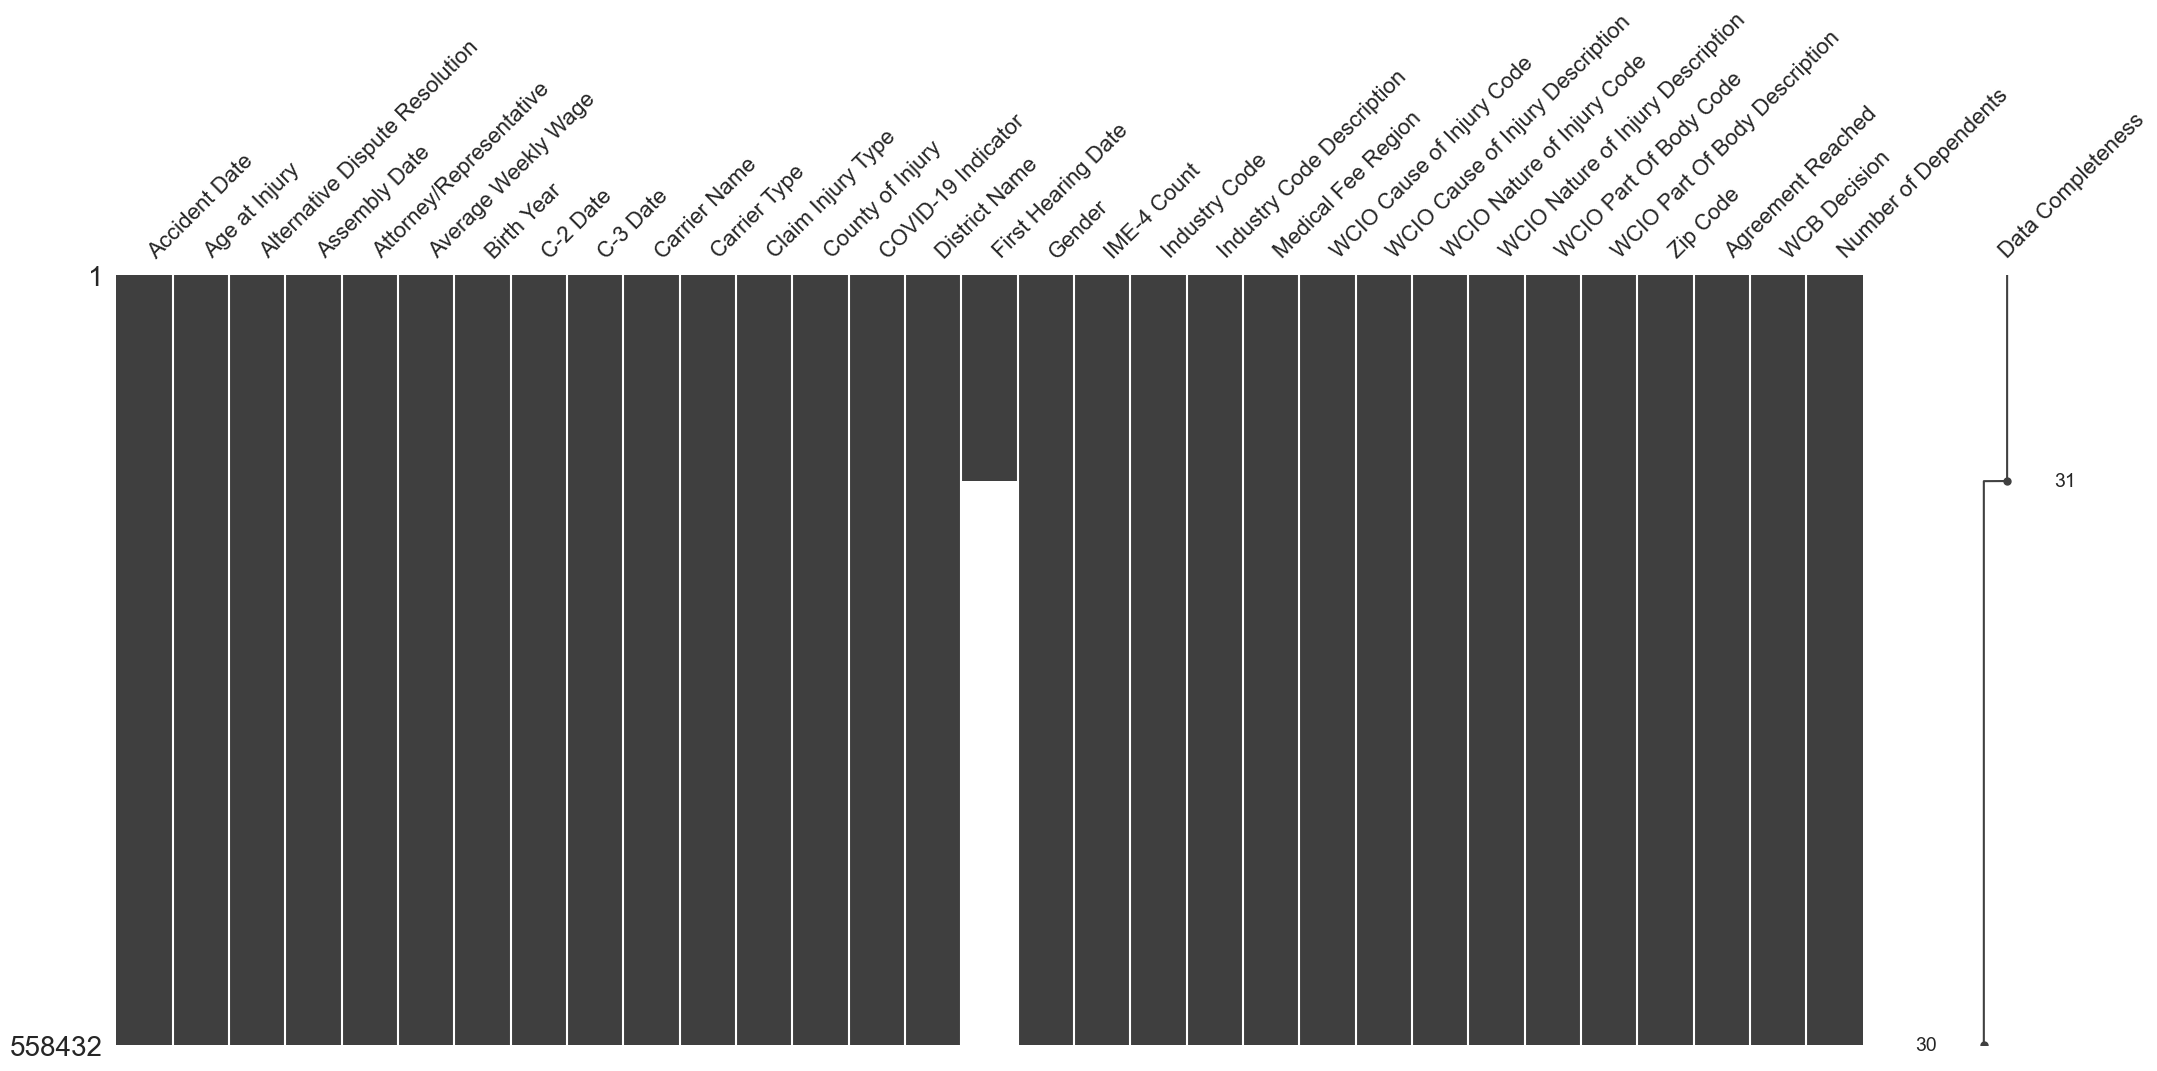

In [90]:
msno.matrix(train, labels=True, sort="descending");

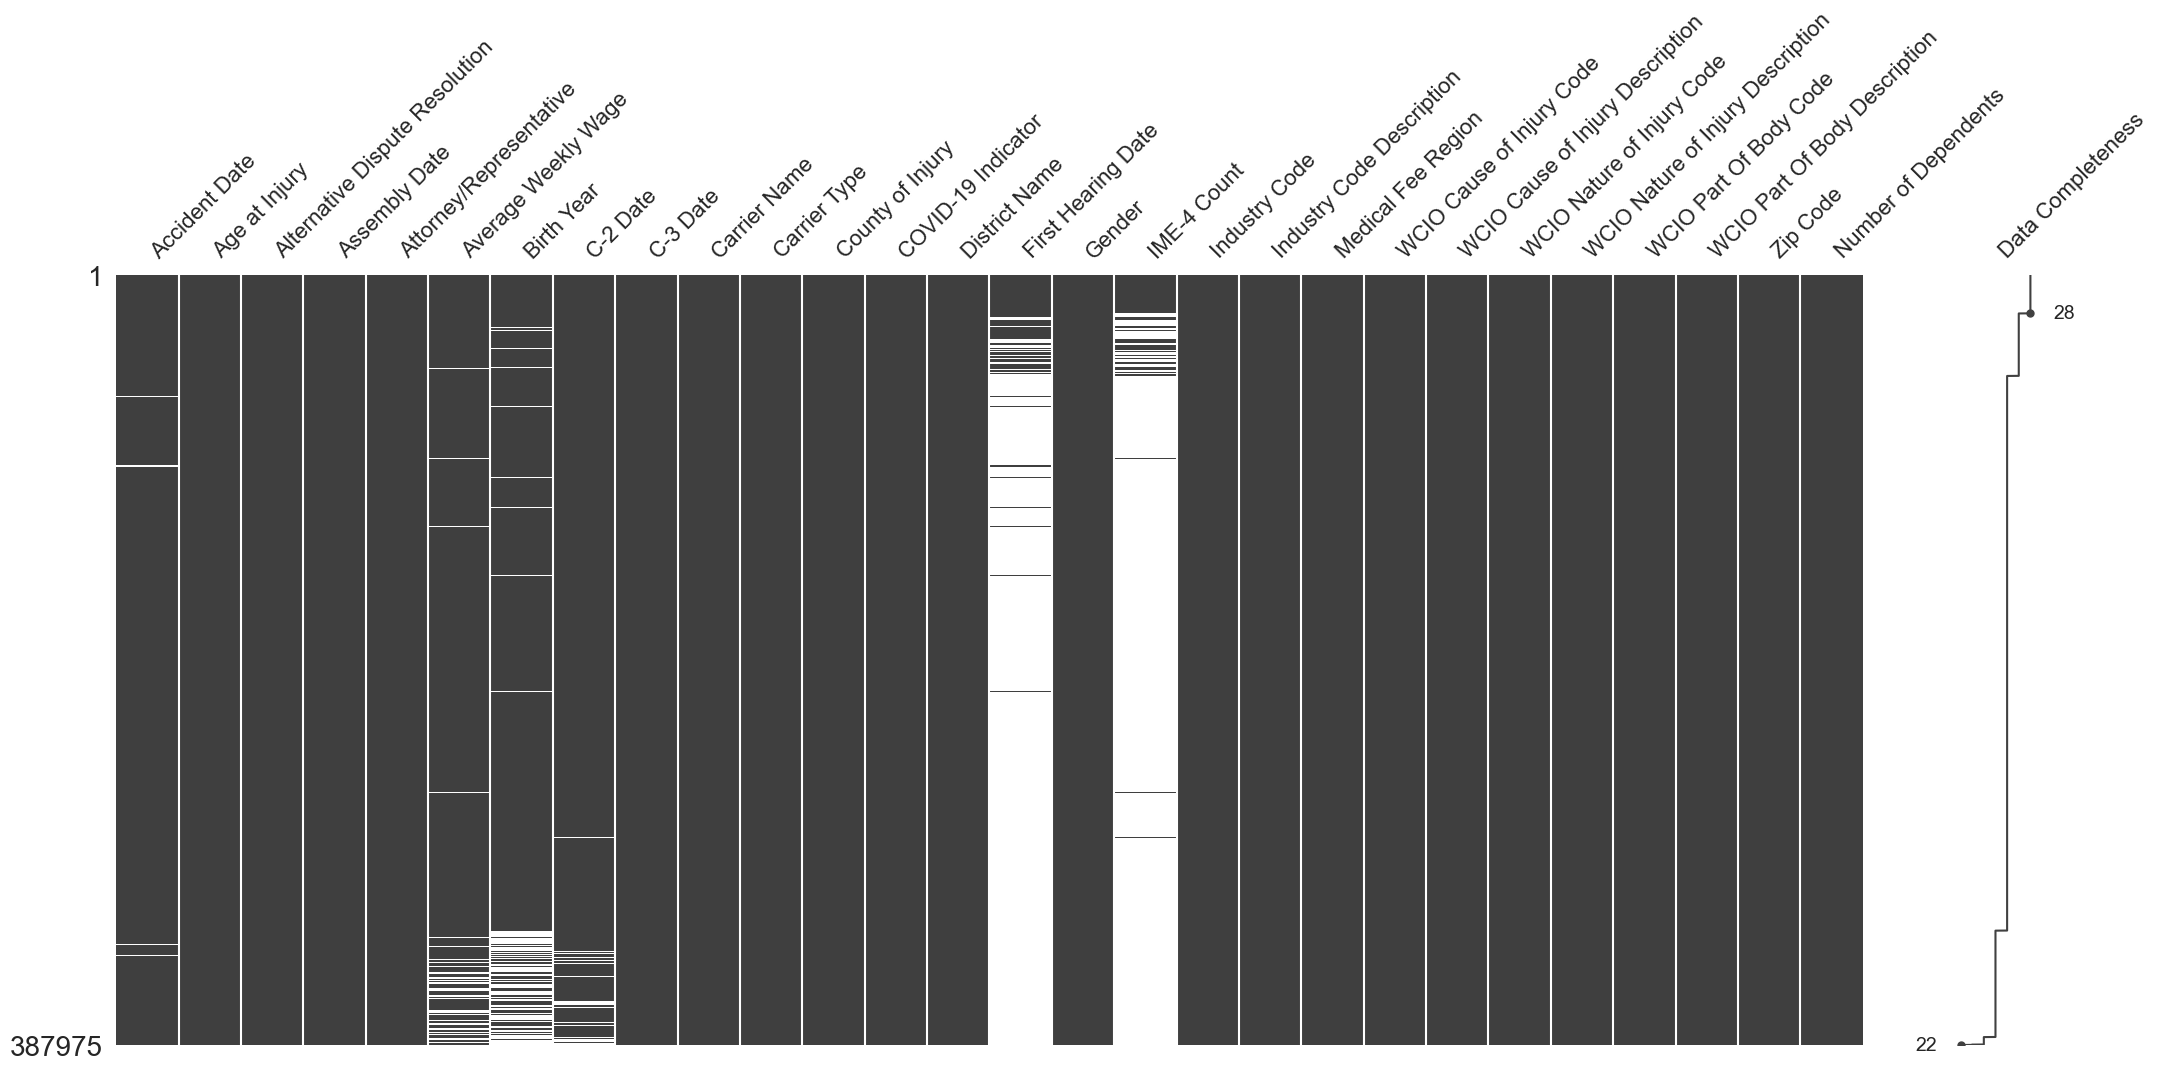

In [91]:
msno.matrix(test, labels=True, sort="descending");